In [1]:
import matplotlib.pyplot as plt
import numpy as np
from divide import data

In [2]:
size = 33
qrcode = np.zeros((size, size), dtype=np.bool)
setbits = np.zeros((size, size), dtype=np.float64)

In [3]:
def finder_pattern(qr, set_bits, i, j, buf_dir):
    di, dj = buf_dir
    qr[i-3:i+4, j-3:j+4] = 0
    qr[i-2:i+3, j-2:j+3] = 1
    qr[i-1:i+2, j-1:j+2] = 0
    qr[i+di*4, j-3:j+5] = 1
    qr[i-3:i+5, j+dj*4] = 1
    set_bits[i-3:i+4, j-3:j+4] = 1
    set_bits[i+di*4, j-3:j+5] = 1
    set_bits[i-3:i+5, j+dj*4] = 1
    
finder_pattern(qrcode, setbits, 3, 3, (1, 1))
finder_pattern(qrcode, setbits, size-3-1, 3, (-1, 1))
finder_pattern(qrcode, setbits, 3, size-3-1, (1, -1))

In [4]:
def alignment_pattern(qr, set_bits, i, j):
    qr[i-2:i+3, j-2:j+3] = 0
    qr[i-1:i+2, j-1:j+2] = 1
    qr[i, j] = 0
    set_bits[i-2:i+3, j-2:j+3] = 1

alignment_pattern(qrcode, setbits, 26, 26)

In [5]:
def timing_pattern(qr, set_bits):
    qr[6, 7:size-7:2] = 1
    qr[7:size-7:2, 6] = 1
    set_bits[6, :] = 1
    set_bits[:, 6] = 1
    
timing_pattern(qrcode, setbits)

In [6]:
def format_bits(qr, set_bits):
    for i in range(0, 8):
        if not set_bits[8, i]:
            set_bits[8, i] = 1
        if not set_bits[i, 8]:
            set_bits[i, 8] = 1
        set_bits[8, 8] = 1
        if not set_bits[size-i-1, 8]:
            set_bits[size-i-1, 8] = 1
        if not set_bits[8, size-i-1]:
            set_bits[8, size-i-1] = 1

qrcode[size-8, 8] = 0
setbits[size-8, 8] = 1
format_bits(qrcode, setbits)

In [7]:
def generate_pattern(size):
    i, j = size-1, size-1
    di = -1
    while True:
        yield i, j
        yield i, j-1
        i += di
        if i < 0 or i >= size:
            di = -di
            i += di
            j -= 2
            if j == 6:
                j -= 1
            if j < 0:
                break

In [8]:
pattern = generate_pattern(size)
for word in data:
    for char in f"{word:08b}":
        i, j = next(pattern)
        while setbits[i, j] != 0:
            i, j = next(pattern)
        if i % 2 == 0:
           qrcode[i, j] = int(char)
        else:
            qrcode[i, j] = 1 - int(char)
        setbits[i, j] = 1

In [9]:
format_mask_bits = '111001011110011'

In [10]:
def format_loc_1(size):
    i, j = size-1, 8
    for _ in range(7):
        yield i, j
        i -= 1
    i, j = 8, size-8
    for _ in range(8):
        yield i, j
        j += 1

In [11]:
def format_loc_2(size):
    i, j = 8, 0
    for _ in range(8):
        yield i, j
        j += 1
        if j == 6:
            j += 1
    i, j = 7, 8
    for _ in range(7):
        yield i, j
        i -= 1
        if i == 6:
            i -= 1

In [12]:
pat1, pat2 = format_loc_1(size), format_loc_2(size)
for char in format_mask_bits:
    p1, p2 = next(pat1), next(pat2)
    qrcode[p1] = 1 - int(char)
    setbits[p1] = 1
    qrcode[p2] = 1 - int(char)
    setbits[p2] = 1

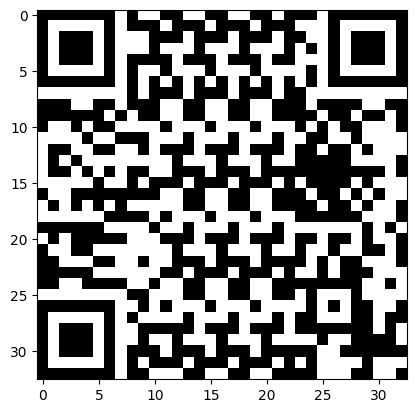

In [13]:
plt.imshow(qrcode, cmap='grey')

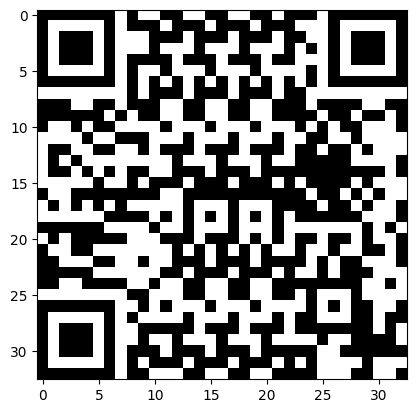

In [15]:
qrcode[18,13] = 0
qrcode[17,14] = 1
qrcode[16,15] = 0
qrcode[16,16] = 0
qrcode[18,17] = 0
qrcode[17,18] = 1
qrcode[16,19] = 0
qrcode[16,20] = 0
qrcode[20,20] = 1
qrcode[18,21] = 0
# qrcode[21, 13:22] = 0
qrcode[21, 14] = 0
qrcode[21, 18] = 0
plt.imshow(qrcode, cmap='grey')